TypeError: unhashable type: 'slice'

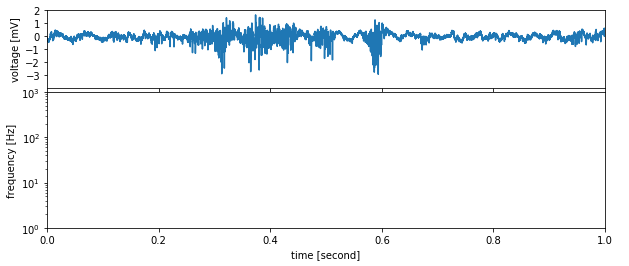

In [10]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
plt.xticks(color="None")
plt.plot(datatime,df[start:end])
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = pycwt.cwt_f(specdataa, widths, 25000, pycwt.Morlet())# pycwt.Mexican_hat(8))
#signal, scales, dt, wavelet = cwtmatr
rr = np.abs(cwtmatr)
xlabel("time [second]")
ylabel("frequency [Hz]")
plt.yticks([1,10,100,1000])
plt.ylim(1,1000)
plt.yscale("log")
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=0)
#im = plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')


spec = pd.DataFrame(rr)
del cwtmatr, specdataa

#a =  np.empty(P,len(df[start:end]))
del rr
s=1000
h=150
spec_new = pd.DataFrame(index=spec.index-h, columns=[])
for i in range(0,len(df[start:end])-1,s) :
    #spec1 = spec[[i],[h:spec.index]]
    #print(spec[i])
    spec1 = spec.iloc[h:,i]
    print(spec[h:,i])
    mr = max(spec1)
    #print(mr)
    spec1 /= mr
    spec_new[i/s]=spec1
    #plot(spec1)
    #print(type(spec1))
    #spec1.to_csv('torima.csv',index=False)
    #a[i,] = spec1
spec_new.to_csv('torimahigh.csv',index=False)
im = plt.imshow(spec_new, extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')

xlim(starttime, endtime)
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
#plt.show()
plt.savefig('toriahigh.png',dpi=300)

#for i in range(len(freq)) :
 #   freq = cwtmatr[:,i]
    
#freq = pd.Series(cwtmatr, dtype='c8')
#freq1 = cwtmatr.ix[600]
#print(rr)
#spec = pd.DataFrame(rr)
#del cwtmatr

#a =  np.empty(P,len(df[start:end]))

#print(freq1)

#print(sys.path)

#p.show()
del df, widths, axColor, spec, spec1